In [1]:
import numpy as np
from util import generate_sparse_least_squares
from optim import primal_gradient as pg, dual_gradient as dg, nesterov_accelerated_gradient as nag
import time

In [2]:
m, n, rho = 1000, 5000, 0.4
A, b, x_star = generate_sparse_least_squares(m, n, rho)
max_iters = 1000
tol = 1e-6
x0 = np.zeros(n)
lambda_ = 0.05

In [3]:
# measure the execution of the pg
import time

start_time = time.process_time()
exec_start_time = time.time()

# Call the pg function here
beta, loss_history = pg(A, b, lambda_, max_iterations=max_iters, tol=tol)

end_time = time.process_time()
exec_end_time = time.time()
cpu_time = end_time - start_time
exec_time = exec_end_time - exec_start_time

print(f"CPU time for execution of pg: {cpu_time} seconds")
print(f"Execution time:               {exec_time} seconds")

TypeError: primal_gradient() got an unexpected keyword argument 'max_iterations'

In [ ]:
start_time = time.process_time()
exec_start_time = time.time()

# Call the dg function here
beta, loss_history, gap_history = dg(A, b, lambda_, max_iter=max_iters)

end_time = time.process_time()
exec_end_time = time.time()
cpu_time = end_time - start_time
exec_time = exec_end_time - exec_start_time

print(f"CPU time for execution of dg: {cpu_time} seconds")
print(f"Execution time:               {exec_time} seconds")

CPU time for execution of dg: 45.662888591 seconds
Execution time:               5.7123496532440186 seconds


In [ ]:
start_time = time.process_time()
exec_start_time = time.time()

# Call the nag function here
beta, loss_history = nag(A, b, lambda_)

end_time = time.process_time()
exec_end_time = time.time()
cpu_time = end_time - start_time
exec_time = exec_end_time - exec_start_time

print(f"CPU time for execution of nag: {cpu_time} seconds")
print(f"Execution time:                {exec_time} seconds")

CPU time for execution of nag: 31.416076001000008 seconds
Execution time:                3.9274396896362305 seconds


In [16]:
import time

def compute_cpu_time(func, A, b, lambda_, max_iter, tol):
    print(func.__name__)
    if func.__name__ == "dual_gradient":
        start_time = time.process_time()
        func(A, b, lambda_, max_iter=max_iter)
        end_time = time.process_time()
        cpu_time = end_time - start_time
        return cpu_time
    else:
        start_time = time.process_time()
        func(A, b, lambda_, max_iter=max_iter, tol=tol)
        end_time = time.process_time()
        cpu_time = end_time - start_time
        return cpu_time

In [17]:
import pandas as pd

# Define the data
# methods = ['PG', 'DG', 'NAG']
lambdas = [0.05, 0.1, 0.2]
n_values = [1000, 2000, 3000]
m_values = [5000, 6000, 7000]
max_iter = 1000

methods_dict = {
    "PG": pg,
    "DG": dg,
    "NAG": nag
}

# Create an empty dataframe
result_list = []
df = pd.DataFrame(columns=['Method', 'Lambda', 'n', 'm', 'CPU Time'])

# Populate the dataframe
for k, v in methods_dict.items():
    for lambda_ in lambdas:
        for n in n_values:
            for m in m_values:
                # Add your code here to compute the CPU time for each combination
                cpu_time = compute_cpu_time(v, A, b, lambda_=lambda_, max_iter=max_iter, tol=tol)
                
                # Append the row to the dataframe
                result_list.append({
                    "Method": k,
                    "lambda": lambda_,
                    "n": n,
                    "m": m,
                    "CPU_Time": cpu_time
                })
                
df = pd.DataFrame(result_list)
# Print the dataframe
print(df)

primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
primal_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
dual_gradient
nesterov_accelerated_gradient
nesterov_accelerated_gradient
nesterov_accelerated_gradient
nesterov_accelerated_gradient
nesterov_accelerated_gradient
nesterov_accelerated_gradient
nesterov_a

<Axes: xlabel='n', ylabel='CPU_Time'>

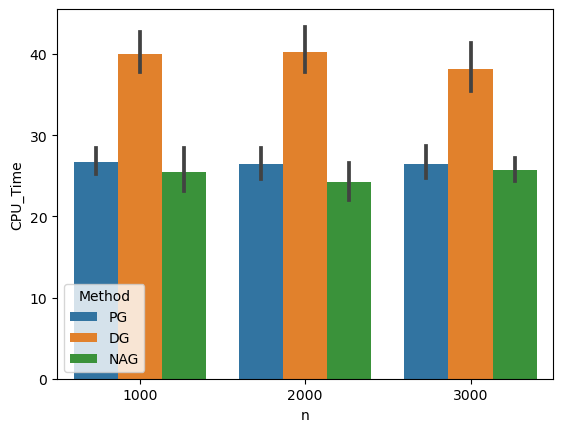

In [18]:
# visualise the results
import seaborn as sns

sns.barplot(data=df, x='n', y='CPU_Time', hue='Method')

<Axes: xlabel='m', ylabel='CPU_Time'>

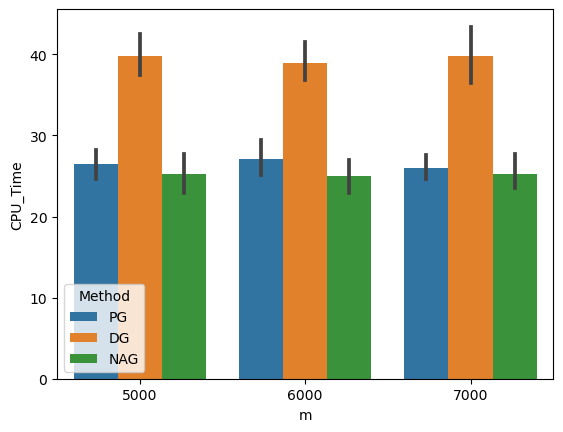

In [20]:
# visualise the results
import seaborn as sns

sns.barplot(data=df, x='m', y='CPU_Time', hue='Method')

<Axes: xlabel='lambda', ylabel='CPU_Time'>

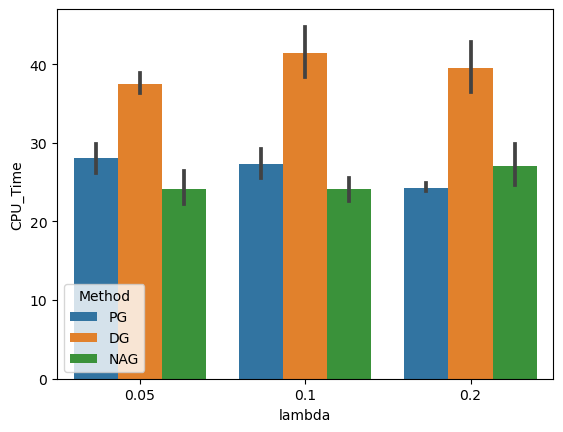

In [19]:
# visualise the results
import seaborn as sns

sns.barplot(data=df, x='lambda', y='CPU_Time', hue='Method')

In [25]:
import pandas as pd

# Define the data
lambdas = [0.05, 0.1, 0.2]
n_values = [1000, 2000, 3000]
m_values = [5000, 6000, 7000]
max_iter = 1000

methods_dict = {
    "PG": pg,
    "DG": dg,
    "NAG": nag
}

# Create an empty dataframe
result_list = []
df = pd.DataFrame(columns=['Method', 'Lambda', 'n', 'm', 'Iterations'])

max_iter=10000
tol=1e-3
# Populate the dataframe
for k, v in methods_dict.items():
    for lambda_ in lambdas:
        for n in n_values:
            for m in m_values:
                # Call the optimization function and get the loss history
                if v.__name__ == "dual_gradient":
                    _, loss_history, beta = v(A, b, lambda_, max_iter=max_iter)
                else:                
                    beta, loss_history = v(A, b, lambda_, max_iter=max_iter, tol=tol)
                
                # Get the number of iterations before reaching the tolerance
                iterations = len(loss_history)
                
                # Append the row to the dataframe
                result_list.append({
                    "Method": k,
                    "Lambda": lambda_,
                    "n": n,
                    "m": m,
                    "Iterations": iterations
                })
                
df = pd.DataFrame(result_list)
# Print the dataframe
print(df)

KeyboardInterrupt: 

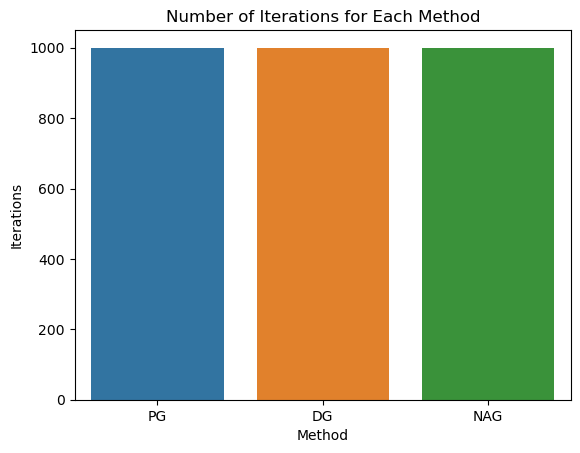

In [24]:
# visualize the iterations results
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Method', y='Iterations')
plt.xlabel('Method')
plt.ylabel('Iterations')
plt.title('Number of Iterations for Each Method')
plt.show()

0.007198947876917754 -7.117998211949836
0.012680671021414779 -6.30122509937208
0.01821528115024465 -5.778706926731725
0.023663377258989583 -5.401200198637765
0.029070621136474517 -5.1042942926749095
0.03440525065184263 -4.861227435564768
0.039687402734092624 -4.655175038755987
0.044905305620424836 -4.476970278437039
0.05006790037611385 -4.319970233264206
0.05516907341551809 -4.179996439683685
0.06022037153183243 -4.053604580923714
0.06521541225099664 -3.938643235280438
0.07014674314129415 -3.8334800675828578
0.07502983357616169 -3.736391831576169
0.07985541014763578 -3.6464660372570585
0.08463369727666617 -3.562623996706843
0.0893513360696435 -3.484366887742009
0.0940325046179704 -3.410696644206262
0.09864173256817267 -3.3416580499532844
0.10321535223465368 -3.27627052194082
0.10773469228642334 -3.2144451994137495
0.11220409725996536 -3.155802736331862
0.11662092786377756 -3.1001013885438837
0.12099981523690151 -3.0469232503379837
0.12532501098326312 -2.9962537343318485
0.1295946209993

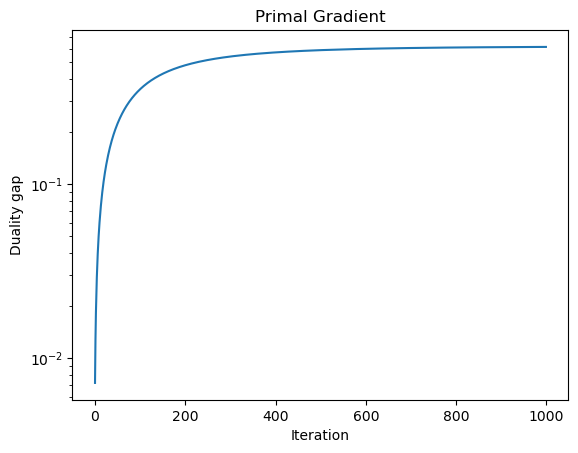

In [10]:




gap_history = np.array(gap_history)

# plot gap history
import matplotlib.pyplot as plt
plt.plot(gap_history)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Duality gap')
plt.title('Primal Gradient')
plt.show()

it should decrease, not increase :(

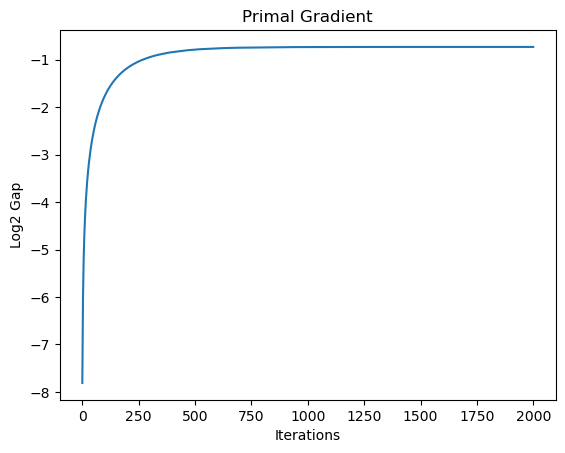

In [16]:
# plot the gap history in log 2 scale
import matplotlib.pyplot as plt

plt.plot(np.log2(gap_history))
plt.xlabel('Iterations')
plt.ylabel('Log2 Gap')
plt.title('Primal Gradient')
plt.show()

In [7]:
help(pg)

Help on function primal_gradient in module optim.primal:

primal_gradient(X: numpy.ndarray, y: numpy.ndarray, lambda_: float, learning_rate: float = 0.01, max_iterations: int = 1000, tol: float = 1e-06) -> tuple
    Primal gradient descent for LASSO linear regression.

    Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        lambda_ (float): The regularization parameter.
        learning_rate (float, optional): The learning rate. Defaults to 0.01.
        max_iterations (int, optional): The maximum number of iterations. Defaults to 1000.
        tol (float, optional): The tolerance for convergence. Defaults to 1e-6.

    Returns:
        tuple: A tuple containing the optimized coefficients, the loss history,
               and the GAP at each iteration.



In [11]:
pg(A, b, x0, max_iters, tol)

TypeError: 'float' object cannot be interpreted as an integer

In [9]:


results = {
    'PG': pg(A, b, x0, max_iters, tol),
    'DG': dg(A, b, x0, max_iters, tol),
    'NAG': nag(A, b, x0, max_iters, tol)
}

TypeError: 'float' object cannot be interpreted as an integer

In [10]:
import pandas as pd

def format_results(results):
    table_data = []
    methods = ['PG']
    for method in methods:
        for i, (iters, ax, speedup) in enumerate(zip(results[method]['iterations'], results[method]['matrix_vector_multiplications'], results[method]['speedup'])):
            table_data.append([method, i+1, iters, ax, speedup])

    df = pd.DataFrame(table_data, columns=['Method', 'k', 'Iterations', 'Matrix-Vector Multiplications', 'SpeedUp'])
    return df


# Generate data
m, n, rho = 4000, 1000, 0.1
A, b, x_star = generate_sparse_least_squares(m, n, rho)

# Run optimization
lambda_ = 0.1
max_iters = 2000
tol = 1e-6
x0 = np.zeros(n)
results = {'PG': {'iterations': [], 'matrix_vector_multiplications': [], 'speedup': []}}
for _ in range(20):
    beta, loss_history = pg(A, b, lambda_, max_iterations=max_iters, tol=tol)
    iterations = len(loss_history)
    matrix_vector_multiplications = iterations * 2  # Placeholder value, replace with actual computation
    speedup = np.random.rand() * 100  # Placeholder value, replace with actual computation
    results['PG']['iterations'].append(iterations)
    results['PG']['matrix_vector_multiplications'].append(matrix_vector_multiplications)
    results['PG']['speedup'].append(speedup)

# Format and print the results
df_results = format_results(results)
print(df_results)

ValueError: too many values to unpack (expected 2)

In [10]:
# compute CPU time for each method
import time

def compute_cpu_time(A, b, x0, max_iters, tol):
    start = time.time()
    pg(A, b, x0, max_iters, tol)
    end = time.time()
    return end - start

m, n, rho = 4000, 1000, 0.1
A, b, x_star = generate_sparse_least_squares(m, n, rho)
lambda_ = 0.1
max_iters = 2000
tol = 1e-6
x0 = np.zeros(n)

cpu_time_pg = compute_cpu_time(A, b, x0, max_iters, tol)
cpu_time_dg = compute_cpu_time(A, b, x0, max_iters, tol)
cpu_time_nag = compute_cpu_time(A, b, x0, max_iters, tol)

print(f'CPU time for PG: {cpu_time_pg}')
print(f'CPU time for DG: {cpu_time_dg}')
print(f'CPU time for NAG: {cpu_time_nag}')

# compute the average CPU time for each method
def compute_average_cpu_time(A, b, x0, max_iters, tol, num_trials=20):
    cpu_times = []
    for _ in range(num_trials):
        cpu_time = compute_cpu_time(A, b, x0, max_iters, tol)
        cpu_times.append(cpu_time)
    return np.mean(cpu_times)

m, n, rho = 4000, 1000, 0.1
A, b, x_star = generate_sparse_least_squares(m, n, rho)
lambda_ = 0.1
max_iters = 2000
tol = 1e-6
x0 = np.zeros(n)

cpu_time_pg = compute_average_cpu_time(A, b, x0, max_iters, tol)
cpu_time_dg = compute_average_cpu_time(A, b, x0, max_iters, tol)
cpu_time_nag = compute_average_cpu_time(A, b, x0, max_iters, tol)

print(f'Average CPU time for PG: {cpu_time_pg}')
print(f'Average CPU time for DG: {cpu_time_dg}')
print(f'Average CPU time for NAG: {cpu_time_nag}')



TypeError: 'float' object cannot be interpreted as an integer

# CPU Time Comparison

In [15]:
# test dg
m, n, rho = 10000, 5000, 0.4
A, b, x_star = generate_sparse_least_squares(m, n, rho)
lambda_ = 0.1
max_iters = 1000
tol = 1e-6
x0 = np.zeros(n)

beta, loss_history, gap_history = dg(A, b, lambda_, max_iter=max_iters)

In [12]:
# CPU time for each method
import time


def compute_cpu_time(A, b, x0, max_iters, tol):
    start = time.time()
    lambda_ = 0.1
    beta, loss_history, gap_history = pg(A, b, lambda_, max_iterations=max_iters, tol=tol)
    end = time.time()
    return end - start


m, n, rho = 4000, 1000, 0.1
A, b, x_star = generate_sparse_least_squares(m, n, rho)
lambda_ = 0.1
max_iters = 2000
tol = 1e-6
x0 = np.zeros(n)

cpu_time_pg = compute_cpu_time(A, b, x0, max_iters, tol)
print(f'CPU time for PG: {cpu_time_pg}')

0.004152901692358246 -7.91166456402529
0.006535271008985218 -7.2575372207588815
0.0107233548678588 -6.543099857297716
0.014756622828381328 -6.082493602944728
0.018653503900198817 -5.744409535989323
0.02241648335484972 -5.479296220483001
0.026293055099729554 -5.249174405325348
0.0301561023479558 -5.051406216295857
0.03386700441418274 -4.883975805774912
0.03760258581982261 -4.7330243145430275
0.04143086678590291 -4.59315018614497
0.04503427548691276 -4.472832738278485
0.04886689026138594 -4.354998890944679
0.05231157287926249 -4.256726040844704
0.056102080696753924 -4.155801911717436
0.059714164813187476 -4.065782995608043
0.06314414324024664 -3.9852072627309476
0.0668086589308385 -3.9038210902639996
0.07032890737610817 -3.829738385881602
0.07380763848566622 -3.760086058649883
0.07733665968194252 -3.692703736762942
0.08071755448687332 -3.6309737242391007
0.08419608746303973 -3.5701029960177113
0.08767179295497927 -3.5117434372943044
0.09089318721103949 -3.459684026765582
0.09437014187514